# numpy

## Задача №1. Скользящее окно

Реализовать функцию скользящего окна для заданного одномерного ряда данных, формирующую из него матрицу по следующему правилу:

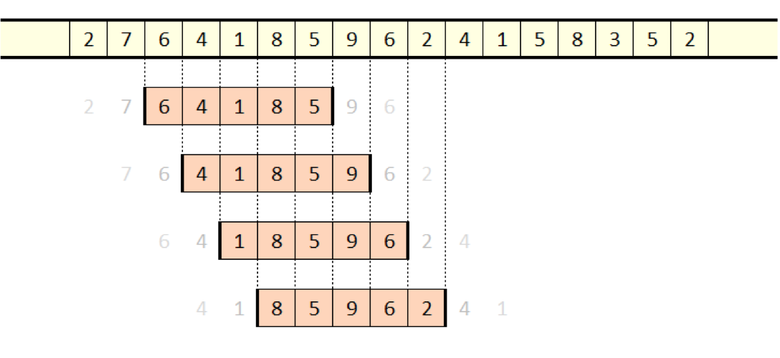

Аргументы функции:

*x_array* - одномерный массив **numpy.ndarray**

*w* - ширина окна для итоговой матрицы

*step* - шаг окна по исходному одномерному ряду данных

Результат:

*A_matrix* - матрица скользящего среднего

In [2]:
import numpy as np


def sliding_window(x_array, w, step=1):
    if len(x_array) < w:
        raise ValueError("Ширина окна больше длины входного массива")
    if step <= 0:
        raise ValueError("Шаг окна должен быть положительным числом")

    num_windows = (len(x_array) - w) // step + 1
    A_matrix = np.zeros((num_windows, w))
    for i in range(num_windows):
        start = i * step
        end = start + w
        window = x_array[start:end]
        A_matrix[i, :] = window
    return A_matrix

In [3]:
# проверка 1
window = 3
step_s = 1
x1 = np.array([8, 1, 4, 5, -2, 5, 9, 0])
A1 = np.array([[8, 1, 4],
               [1, 4, 5],
               [4, 5, -2],
               [5, -2, 5],
               [-2, 5, 9],
               [5, 9, 0]])

print(np.array_equal(sliding_window(x1, w=window, step=step_s), A1))

# проверка 2
window = 2
step_s = 4
x2 = np.array([8, 3, 4, 1, -6, 5, 9, 2, 10, 11, -14, 0])
A2 = np.array([[8, 3],
               [-6, 5],
               [10, 11]])

print(np.array_equal(sliding_window(x2, w=window, step=step_s), A2))

True
True


# **Анализ данных по доходу населения UCI Adult**


Автор материала: Юрий Кашницкий (@yorko в Slack ODS). Материал распространяется на условиях лицензии Creative Commons CC BY-NC-SA 4.0. Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

**В задании предлагается с помощью Pandas ответить на несколько вопросов по данным репозитория UCI [Adult](https://archive.ics.uci.edu/ml/datasets/Adult)**

Уникальные значения признаков (больше информации по ссылке выше):

- age: continuous.

- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- salary: >50K,<=50K

In [4]:
import pandas as pd
import numpy as np

data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", sep=", ", header=None,
                   names=["age", "workclass", "fnlwgt", "education",
                          "education-num", "marital-status", "occupation", "relationship",
                          "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "salary"])

list_of_objects = data.dtypes.axes[0][data.dtypes == "object"]
data[list_of_objects] = data[list_of_objects].astype("string")

data.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6396\2010241572.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", sep=", ", header=None,


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## **0. Изучить в документации методы groupby и agg**

## **1. Сколько мужчин и женщин (признак sex) представлено в этом наборе данных?**

### Визуализировать результат

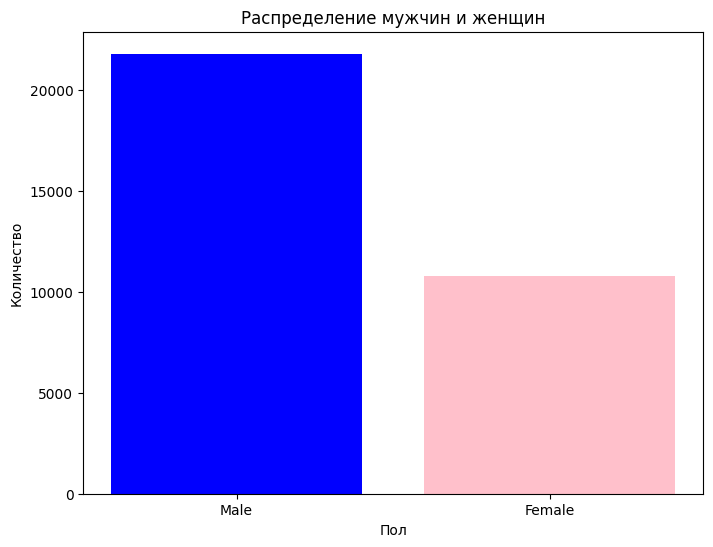

Количество мужчин  21790
Количество женщин  10771


In [11]:
import matplotlib.pyplot as plt

gender_counts = data["sex"].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(gender_counts.index, gender_counts.values, color=["blue", "pink"])
plt.title("Распределение мужчин и женщин")
plt.xlabel("Пол")
plt.ylabel("Количество")
plt.show()

print("Количество мужчин ", gender_counts["Male"])
print("Количество женщин ", gender_counts["Female"])

## **2. Каков средний возраст (признак age) женщин?**

In [12]:
average_female_age = data[data["sex"] == "Female"]["age"].mean()
print("Средний возраст женщин: ", average_female_age)

Средний возраст женщин:  36.85823043357163


## **3. Какова доля граждан Германии (признак native-country)?**

In [13]:
germany_citizens = (data["native-country"] == "Germany").sum()
total_citizens = len(data)

germany_percentage = (germany_citizens / total_citizens)
print("Доля граждан Германии: ", germany_percentage, "%")

Доля граждан Германии:  0.004207487485028101 %


## **4-5. Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак salary) и тех, кто получает менее 50K в год?**

### Визуализировать результат

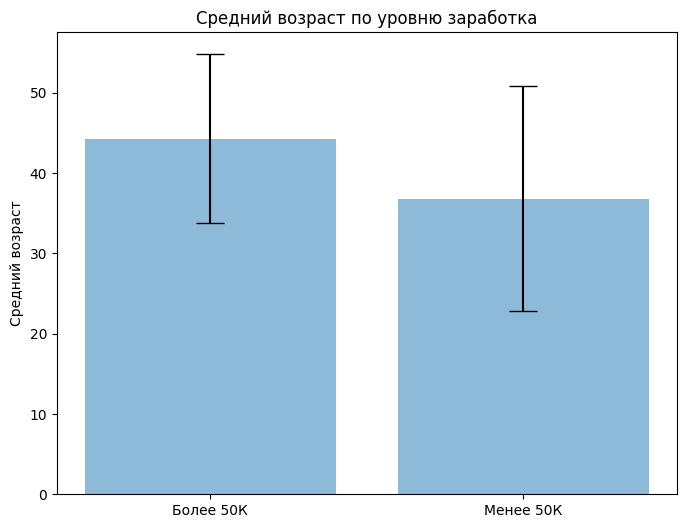

In [21]:
high_salary_group = data[data["salary"] == ">50K"]
low_salary_group = data[data["salary"] == "<=50K"]

mean_age_high_salary = high_salary_group["age"].mean()
std_age_high_salary = high_salary_group["age"].std()

mean_age_low_salary = low_salary_group["age"].mean()
std_age_low_salary = low_salary_group["age"].std()

labels = ["Более 50К", "Менее 50К"]
mean_age = [mean_age_high_salary, mean_age_low_salary]
std_age = [std_age_high_salary, std_age_low_salary]

x = range(len(labels))

plt.figure(figsize=(8, 6))
plt.bar(x, mean_age, yerr=std_age, align="center", alpha=0.5, capsize=10)
plt.xticks(x, labels)
plt.ylabel("Средний возраст")
plt.title("Средний возраст по уровню заработка")
plt.show()

## **6. Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)**

In [23]:
higher_education = ['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']

high_salary_has_higher_education = high_salary_group['education'].isin(higher_education).all()

if high_salary_has_higher_education:
    print("Верно")
else:
    print("Неверно")

Неверно


## **7. Выведите статистику возраста для каждой расы (признак race) и каждого пола. Используйте groupby и describe. Найдите таким образом максимальный возраст мужчин расы Amer-Indian-Eskimo.**

In [24]:
race_sex_stats = data.groupby(['race', 'sex'])['age'].describe()
print(race_sex_stats)

max_age_amer_indian_eskimo_male = race_sex_stats.loc[('Amer-Indian-Eskimo', 'Male'), 'max']
print("Максимальный возраст мужчин расы Amer-Indian-Eskimo:", max_age_amer_indian_eskimo_male)

                             count       mean        std   min   25%   50%  \
race               sex                                                       
Amer-Indian-Eskimo Female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                   Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
Asian-Pac-Islander Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                   Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
Black              Female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                   Male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
Other              Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                   Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
White              Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                   Male    19174.0  39.652498  13.436029  17.0  29.0  38.0   

                             75%   max  
race               sex

## **8. Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.**

### Визуализировать результат

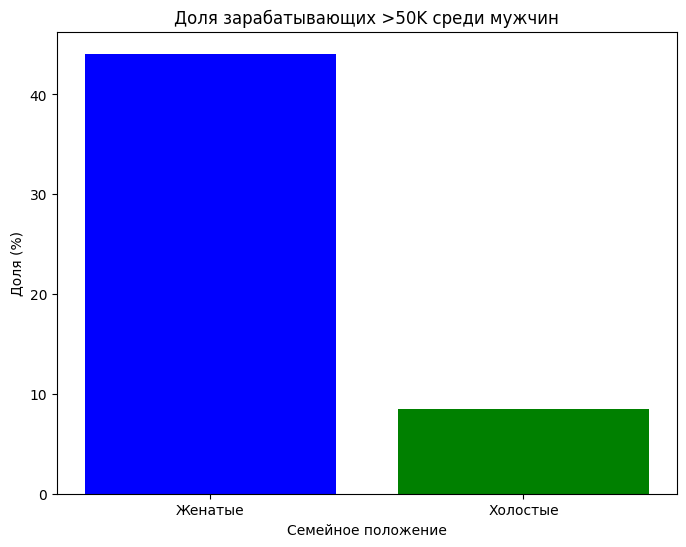

Среди женатых мужчин больше доля зарабатывающих много (>50K).


In [25]:
married_statuses = ['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse']
data['marital-status-binary'] = data['marital-status'].apply(lambda x: 1 if x in married_statuses else 0)

married_men = data[(data['sex'] == 'Male') & (data['marital-status-binary'] == 1)]
single_men = data[(data['sex'] == 'Male') & (data['marital-status-binary'] == 0)]

married_high_income_percentage = (married_men['salary'] == '>50K').mean()
single_high_income_percentage = (single_men['salary'] == '>50K').mean()

labels = ['Женатые', 'Холостые']
percentages = [married_high_income_percentage * 100, single_high_income_percentage * 100]

plt.figure(figsize=(8, 6))
plt.bar(labels, percentages, color=['blue', 'green'])
plt.title('Доля зарабатывающих >50K среди мужчин')
plt.xlabel('Семейное положение')
plt.ylabel('Доля (%)')
plt.show()

if married_high_income_percentage > single_high_income_percentage:
    print("Среди женатых мужчин больше доля зарабатывающих много (>50K).")
else:
    print("Среди холостых мужчин больше доля зарабатывающих много (>50K).")

## **9. Какое максимальное число часов человек работает в неделю (признак hours-per-week)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?**

In [26]:
max_hours_per_week = data['hours-per-week'].max()
people_with_max_hours = data[data['hours-per-week'] == max_hours_per_week]
percentage_high_income_max_hours = (people_with_max_hours['salary'] == '>50K').mean() * 100

print("Максимальное количество часов в неделю:", max_hours_per_week)
print("Количество людей, работающих столько часов:", len(people_with_max_hours))
print("Процент из них, зарабатывающих много (>50K):", percentage_high_income_max_hours, "%")

Максимальное количество часов в неделю: 99
Количество людей, работающих столько часов: 85
Процент из них, зарабатывающих много (>50K): 29.411764705882355 %


## **10. Посчитайте среднее время работы (hours-per-week) зарабатывающих мало и много (salary) для каждой страны (native-country).**

### Визуализировать результат

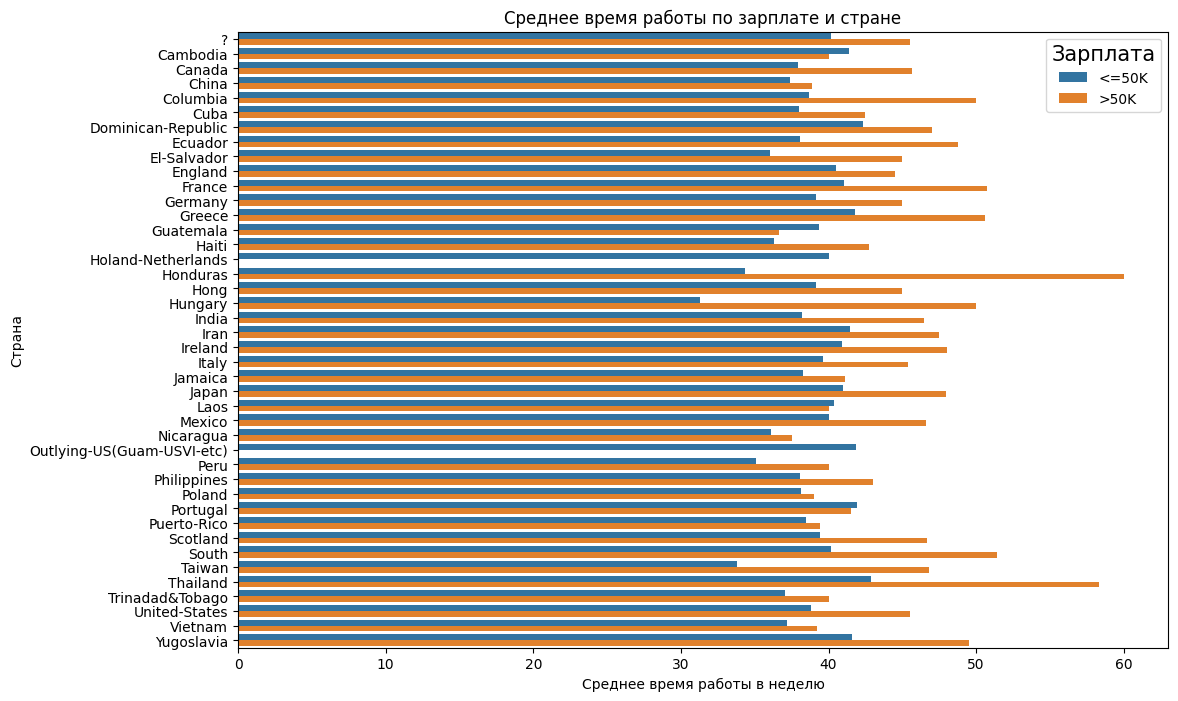

In [28]:
import seaborn as sns

# Группируем данные по стране и зарплате, затем вычисляем среднее время работы
grouped = data.groupby(['native-country', 'salary'])['hours-per-week'].mean().reset_index()

# Фильтруем данные только для тех стран, где есть как минимум один представитель с низкой и высокой зарплатой
grouped = grouped[grouped['salary'].isin(['<=50K', '>50K'])]

# Визуализируем результаты
plt.figure(figsize=(12, 8))
sns.barplot(data=grouped, x='hours-per-week', y='native-country', hue='salary')
plt.title('Среднее время работы по зарплате и стране')
plt.xlabel('Среднее время работы в неделю')
plt.ylabel('Страна')
plt.legend(title='Зарплата', title_fontsize='15')
plt.show()